In [2]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## Partial least squares regression

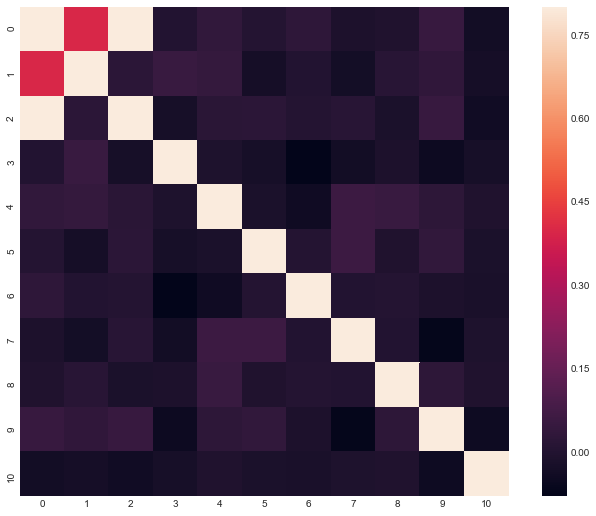

In [3]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8349508972768618
R-squared PLSR: 0.8349508107585238


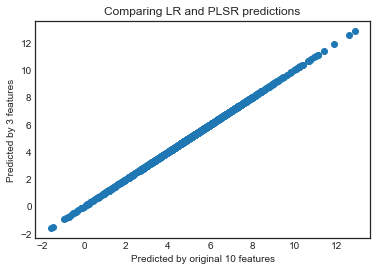

In [4]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc).

The trick to successful PLSR is to select the right number of components to keep. Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

In [5]:
# Your PLSR models here.
regr.score(X, y)

0.8349508972768618

## With 9, 3, and 1 Components

R-squared PLSR: 0.8349508972768618


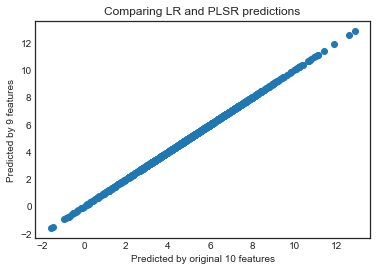

R-squared PLSR: 0.8349508107585238


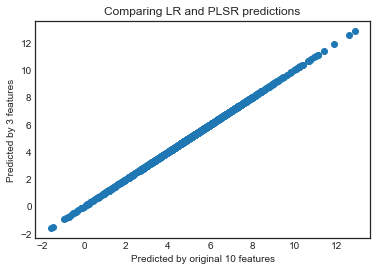

R-squared PLSR: 0.828920444536248


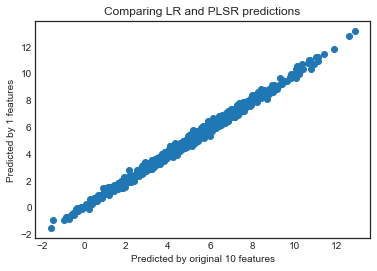

In [11]:
pls9=PLSRegression(n_components=9)
pls9.fit(X, y)

Y_PLS_9_pred=pls9.predict(X)
print('R-squared PLSR:', pls9.score(X, y))

plt.scatter(Y_pred,Y_PLS_9_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 9 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

pls3=PLSRegression(n_components=3)

pls3.fit(X, y)

Y_PLS_3_pred=pls3.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

plt.scatter(Y_pred,Y_PLS_3_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

pls1=PLSRegression(n_components=1)

pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

#R-squared lower when component is down to one. 